In [40]:
import pandas as pd

#Data Set
crime_data = 'Crime_Data_from_2020_to_Present.csv'

#Data Set to Pandas
df = pd.read_csv(crime_path)

#Data Set Drop
columns_to_drop = ['DR_NO','AREA','Crm Cd 1','Crm Cd 2', 'Crm Cd 3','Cross Street','Crm Cd','Weapon Used Cd','Rpt Dist No','Part 1-2', 'Crm Cd 4', 'Mocodes', 'Premis Cd', 'Status', 'Status Desc', 'Date Rptd']
df.drop(columns=columns_to_drop, inplace=True)

#Change df column names 
column_name_change = {
    "DATE OCC": "Date of Crime",
    "TIME OCC": "Time of Crime",
    "AREA NAME": "Neighborhood",
    "Crm Cd Desc": "Type of Crime",
    "Vict Age": "Age",
    "Vict Sex": "Gender",
    "Vict Descent": "Ethnicity",
    "Premis Desc": "Location",
    "Weapon Desc": "Weapon Used",
    "LOCATION": "Address",
    "LAT": "Latitude",
    "LON": "Longitude"
}
df.rename(columns=column_name_change, inplace=True)

#Get rid of "Nan" data points 
column_name = 'Weapon Used'
df = df[df[column_name].notna()]

#Rename the ethnicity column 
rename_ethnicity = {
    'H':'Hispanic',
    'B':'Black',
    'W':'White',
    'O':'Others',
    'A':'Other Asians'
}
df.replace(rename_ethnicity, inplace=True)

#Display Data Frame
df


,Date of Crime,Time of Crime,Neighborhood,Type of Crime,Age,Gender,Ethnicity,Location,Weapon Used,Address,Latitude,Longitude
0,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,Black,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,Hispanic,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
5,01/01/2020 12:00:00 AM,30,Central,"RAPE, FORCIBLE",25,F,Hispanic,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,700 S BROADWAY,34.0452,-118.2534
10,01/04/2020 12:00:00 AM,2200,Central,BURGLARY FROM VEHICLE,29,M,Other Asians,STREET,ROCK/THROWN OBJECT,15TH,34.0359,-118.2648
11,01/05/2020 12:00:00 AM,955,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,35,M,Others,PARKING LOT,VERBAL THREAT,800 N ALAMEDA ST,34.0615,-118.2412
...,...,...,...,...,...,...,...,...,...,...,...,...
834303,08/27/2023 12:00:00 AM,30,N Hollywood,BRANDISH WEAPON,38,M,Hispanic,STREET,KNIFE WITH BLADE 6INCHES OR LESS,11000 MCCORMICK ST,34.1660,-118.3705
834306,07/24/2023 12:00:00 AM,1400,Hollywood,ROBBERY,23,F,Black,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",5500 HOLLYWOOD BL,34.1038,-118.3151
834309,09/20/2023 12:00:00 AM,1915,Van Nuys,BATTERY - SIMPLE ASSAULT,44,M,Black,LIBRARY,UNKNOWN WEAPON/OTHER WEAPON,6200 SYLMAR AV,34.1837,-118.4465
834316,03/22/2023 12:00:00 AM,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,Hispanic,SIDEWALK,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",12800 FILMORE ST,34.2790,-118.4116


In [50]:
#DataFrame with the count of each crime

crime_count_df = df['Type of Crime'].value_counts().reset_index()

crime_count_df.columns = ['Type of Crime', 'Count']

total_crimes = len(df)

crime_count_df['Percentage'] = (crime_count_df['Count'] / total_crimes) * 100

crime_count_df['Percentage'] = crime_count_df['Percentage'].map('{:.2f}%'.format)

crime_count_df

,Type of Crime,Count,Percentage
0,BATTERY - SIMPLE ASSAULT,66563,22.88%
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",47944,16.48%
2,INTIMATE PARTNER - SIMPLE ASSAULT,41896,14.40%
3,ROBBERY,28597,9.83%
4,CRIMINAL THREATS - NO WEAPON DISPLAYED,17234,5.92%
...,...,...,...
114,TILL TAP - PETTY ($950 & UNDER),1,0.00%
115,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1,0.00%
116,"THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",1,0.00%
117,"EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)",1,0.00%


In [33]:
#What is the most reported crime?

most_reported_crime = df['Type of Crime'].value_counts().idxmax()

crime_frequency = df['Type of Crime'].value_counts().max()

print(f"The most reported crime is '{most_reported_crime}' with the amount of {crime_frequency} incidents.")

The most reported crime is 'BATTERY - SIMPLE ASSAULT' with the amount of 66563 incidents.


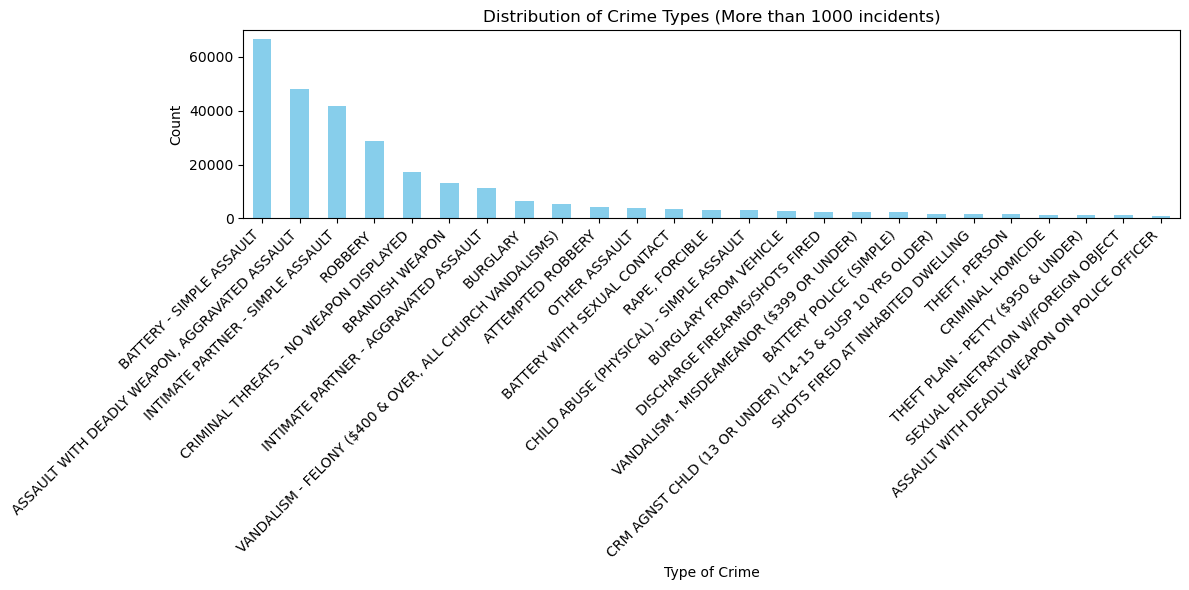

In [43]:
#Bar Graph of "Type of Crime"

import matplotlib.pyplot as plt

# Filtered the DataFrame to include only crimes with more than 1000 incidents
filtered_df_ = df['Type of Crime'].value_counts()
filtered_df = filtered_df[filtered_df > 1000]

#Bar graph data
plt.figure(figsize=(12, 6))
filtered_df.plot(kind='bar', color='skyblue')
plt.xlabel('Type of Crime')
plt.ylabel('Count')
plt.title('Distribution of Crime Types (More than 1000 incidents)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

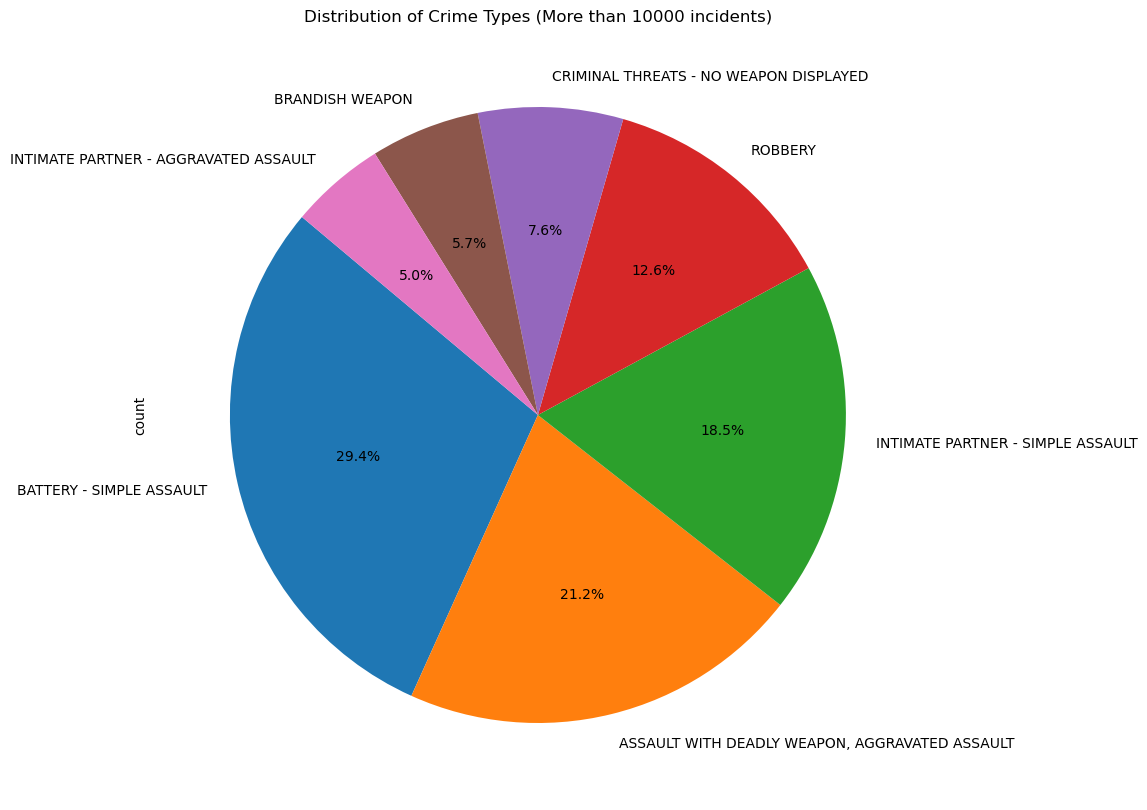

In [45]:
#Pie Chart of "Type of Crime"

# Filtered the DataFrame to include only crime types with more than 10000 incidents
filtered_df = df['Type of Crime'].value_counts()
filtered_df = filtered_df[filtered_df > 10000]

# Pie chart data
plt.figure(figsize=(10, 10))
filtered_df.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Types (More than 10000 incidents)')
plt.show()

In [56]:
#DataFrame with the count of each weapon

weapon_count_df = df['Weapon Used'].value_counts().reset_index()

weapon_count_df.columns = ['Weapon Used', 'Count']

total_count = len(df)

weapon_count_df['Percentage'] = (weapon_count_df['Count'] / total_count) * 100

weapon_count_df['Percentage'] = weapon_count_df['Percentage'].map('{:.2f}%'.format)

weapon_count_df

,Weapon Used,Count,Percentage
0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",155929,53.60%
1,UNKNOWN WEAPON/OTHER WEAPON,30958,10.64%
2,VERBAL THREAT,21342,7.34%
3,HAND GUN,17980,6.18%
4,SEMI-AUTOMATIC PISTOL,6544,2.25%
...,...,...,...
74,MAC-11 SEMIAUTOMATIC ASSAULT WEAPON,3,0.00%
75,MAC-10 SEMIAUTOMATIC ASSAULT WEAPON,2,0.00%
76,M1-1 SEMIAUTOMATIC ASSAULT RIFLE,1,0.00%
77,HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE,1,0.00%


In [39]:
#Which weapons are most often used (guns,physical assault etc.)

most_used_weapon = df['Weapon Used'].value_counts().idxmax()

count_most_used_weapon = df['Weapon Used'].value_counts().max()

print(f"The weapon used the most is '{most_used_weapon}' with a count of {count_most_used_weapon}.")

The weapon used the most is 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' with a count of 155929.


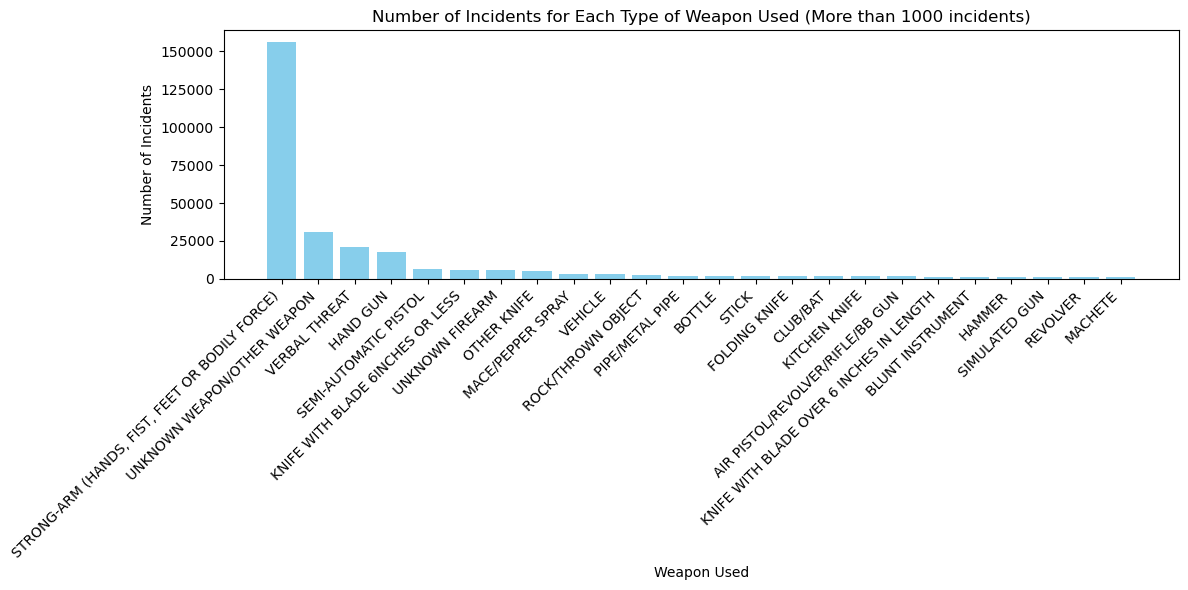

In [52]:
#Bar graph of "Weapon Used"

# Filtered the DataFrame to include only weapons with more than 1000 incidents
filtered_weapon_df = weapon_count_df[weapon_count_df['Count'] > 1000]

# Bar graph data
plt.figure(figsize=(12, 6))
plt.bar(filtered_weapon_df['Weapon Used'], filtered_weapon_df['Count'], color='skyblue')
plt.title('Number of Incidents for Each Type of Weapon Used (More than 1000 incidents)')
plt.xlabel('Weapon Used')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


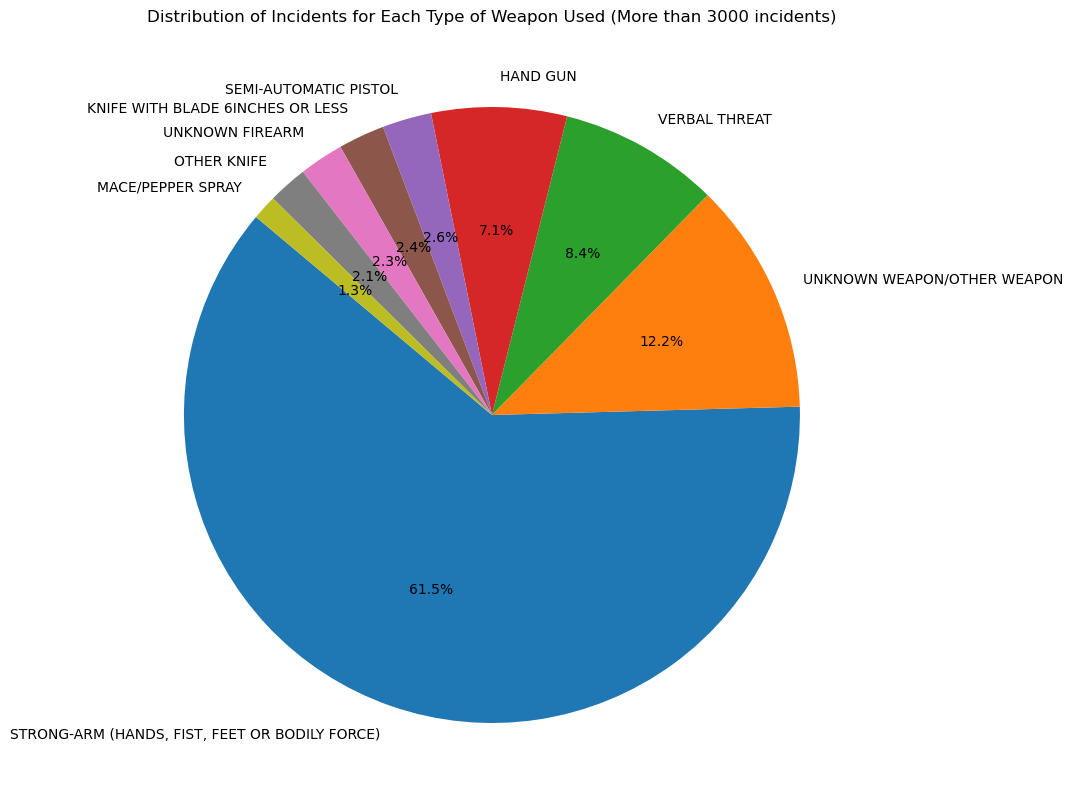

In [54]:
# Pie Graph of "Weapon Used"

# Filtered the DataFrame to include only weapons with more than 3000 incidents
filtered_weapon_df = weapon_count_df[weapon_count_df['Count'] > 3000]

# Pie chart data
plt.figure(figsize=(10, 10))
plt.pie(filtered_weapon_df['Count'], labels=filtered_weapon_df['Weapon Used'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Incidents for Each Type of Weapon Used (More than 3000 incidents)')
plt.show()